In [ ]:
#import libraries

import math
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset

cars = pd.read_csv('/content/original dataset.csv')

In [ ]:
#check first and last 10 rows

cars.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [ ]:
cars.tail(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
46395,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46399,1500,Skoda,Fabia,Gasoline,Manual,Demonstration,12980,60.0,2021
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [ ]:
# Checking null values
cars.isnull().sum()

,0
mileage,0
make,0
model,143
fuel,0
gear,182
offerType,0
price,0
hp,29
year,0


model, gear, hp columns have null values

In [ ]:
# Check datatypes

cars.dtypes

,0
mileage,int64
make,object
model,object
fuel,object
gear,object
offerType,object
price,int64
hp,float64
year,int64


In [ ]:
#setting the float values display format to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cars[['mileage', 'price', 'hp']].describe()

,mileage,price,hp
count,46405.00,46405.00,46376.00
mean,71177.86,16572.34,132.99
std,62625.31,19304.70,75.45
min,0.00,1100.00,1.00
25%,19800.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19490.00,150.00
max,1111111.00,1199900.00,850.00


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [ ]:
#check missing values for first 10  rows of missing dataframe
missing = cars.isnull()
missing.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
# Find average hp and replace missing values
avg_hp = cars['hp'].mean()
avg_hp



132.99098671726756

In [ ]:
cars['hp'].replace(np.nan, avg_hp, inplace = True)
cars['hp'].isnull().sum()

<ipython-input-14-ff033a432b11>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['hp'].replace(np.nan, avg_hp, inplace = True)


0

In [ ]:
#selectes rows in which 'model' is NaN
cars.loc[cars['model'].isna()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.00,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.00,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.00,2019
2019,3550,Opel,NaN,Gasoline,Manual,Used,15800,110.00,2019
2496,3000,Audi,NaN,Electric,Automatic,Demonstration,172450,598.00,2021
...,...,...,...,...,...,...,...,...,...
46074,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46102,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.00,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.00,2021


In [ ]:
# Drop rows with NaN value in model column

cars.dropna(subset = ["model"], inplace = True)
cars.reset_index(drop = True, inplace = True)

In [ ]:
# Finding most frequent gear column  value and replace missing values
cars['gear'].value_counts().idxmax()


'Manual'

In [ ]:
cars['gear'].replace(np.nan, "Manual", inplace = True)

<ipython-input-18-76f156f73ab3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['gear'].replace(np.nan, "Manual", inplace = True)


In [ ]:
# Also check fuel column
cars['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [ ]:
# replace -/-(fuel) to the most frequent value in fuel column
cars['gear'].value_counts().idxmax()
cars['fuel'].replace('-/- (Fuel)', 'Gasoline', inplace = True)

<ipython-input-20-17a18e19235d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel'].replace('-/- (Fuel)', 'Gasoline', inplace = True)


In [ ]:
#We have seen in descriptive statistics that min value of hp is 1. That can't be true, we should replase it.

cars.loc[cars['hp'] == 1]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,1.00,2012
36106,302000,Toyota,Prius+,Electric/Gasoline,Manual,Used,7985,1.00,2013


In [ ]:
cars[['hp']].loc[(cars['model'] == 'Megane') & (cars['year'] == 2012)].mean()

,0
hp,110.61


In [ ]:
# replace hp 1 values with 110
cars['hp'].replace(1, 110, inplace = True)
cars.loc[(cars['model'] == 'Megane') & (cars['year'] == 2012)]

<ipython-input-23-f79828789e42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['hp'].replace(1, 110, inplace = True)


,mileage,make,model,fuel,gear,offerType,price,hp,year
3805,170000,Renault,Megane,Gasoline,Manual,Used,5000,131.00,2012
4021,112800,Renault,Megane,Gasoline,Manual,Used,4800,101.00,2012
4026,72450,Renault,Megane,Gasoline,Manual,Used,4888,116.00,2012
7187,110000,Renault,Megane,Gasoline,Manual,Used,5499,101.00,2012
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,110.00,2012
9470,101111,Renault,Megane,Gasoline,Manual,Used,5990,110.00,2012
9476,148401,Renault,Megane,Diesel,Manual,Used,5990,106.00,2012
11163,111000,Renault,Megane,Diesel,Manual,Used,5999,106.00,2012
11574,101362,Renault,Megane,Gasoline,Automatic,Used,8750,140.00,2012
12451,124000,Renault,Megane,Diesel,Manual,Used,5750,106.00,2012


In [ ]:
cars[['mileage', 'price', 'hp']].describe()

,mileage,price,hp
count,46262.00,46262.00,46262.00
mean,71259.64,16544.75,132.89
std,62635.20,19253.64,75.01
min,0.00,1100.00,5.00
25%,19900.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19483.75,150.00
max,1111111.00,1199900.00,850.00


In [ ]:
#lets investigate the min hp
cars.loc[cars['hp'] == 5.00]

,mileage,make,model,fuel,gear,offerType,price,hp,year
1984,21800,Microcar,Due,Diesel,Automatic,Used,8490,5.00,2017
7070,18137,Ligier,JS 50,Diesel,Automatic,Used,9950,5.00,2016
12206,49670,Microcar,M.Go,Diesel,Automatic,Used,4950,5.00,2011
18499,51355,Renault,Twizy,Electric,Automatic,Used,4990,5.00,2017
25798,15766,Microcar,M8,Diesel,Manual,Used,3900,5.00,2014
29926,10,Hyundai,Kona,Electric/Gasoline,Automatic,Pre-registered,29490,5.00,2020
30481,24000,Microcar,M.Go,Diesel,Automatic,Used,8200,5.00,2016
34215,17413,Microcar,M.Go,Diesel,Automatic,Used,7990,5.00,2011
37760,1200,Aixam,City,Electric,Automatic,Used,8500,5.00,2014
37803,57800,Ligier,JS 50,Diesel,Automatic,Used,8600,5.00,2014


In [ ]:
#final check of null values
cars.isnull().sum()

,0
mileage,0
make,0
model,0
fuel,0
gear,0
offerType,0
price,0
hp,0
year,0


lets start with the visualizations


Text(0.5, 1.0, 'Horsepower bins')

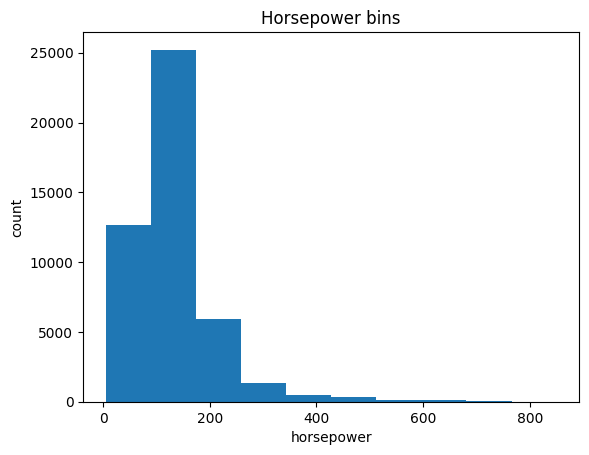

In [ ]:
#horsepower distribution among all the cars
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cars['hp'])

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('Horsepower bins')

In [ ]:
# divide cars into 4 groups of horsepower
groups = np.array([1., 100., 200., 400., 850.])
group_names = ['5-100 hp', '100-200 hp', '200-400 hp', '400 + hp']
cars['hp-bin'] = pd.cut(cars['hp'], groups, labels = group_names, include_lowest = True)
cars[['hp', 'hp-bin']].head(10)

,hp,hp-bin
0,116.00,100-200 hp
1,122.00,100-200 hp
2,160.00,100-200 hp
3,110.00,100-200 hp
4,156.00,100-200 hp
5,99.00,5-100 hp
6,131.00,100-200 hp
7,116.00,100-200 hp
8,150.00,100-200 hp
9,86.00,5-100 hp


In [ ]:
cars.loc[cars['hp-bin'] == '5-100 hp']

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.00,2011,5-100 hp
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.00,2011,5-100 hp
15,72000,Volkswagen,Polo,Gasoline,Manual,Used,6999,60.00,2011,5-100 hp
20,44800,Kia,Picanto,Gasoline,Automatic,Used,7850,86.00,2012,5-100 hp
32,128000,MINI,One D Countryman,Diesel,Manual,Used,7990,90.00,2012,5-100 hp
...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp


<ipython-input-30-8ab02fda012c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pie1 = cars.groupby(['hp-bin']).count()


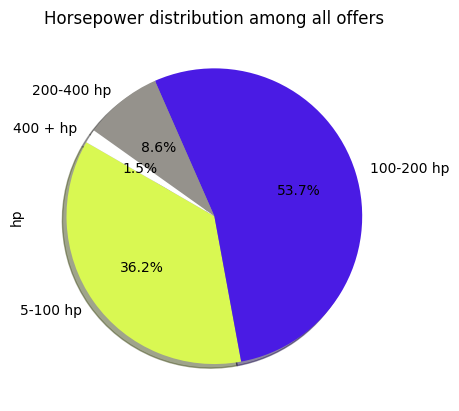

In [ ]:
pie1 = cars.groupby(['hp-bin']).count()
plot = pie1.plot.pie(y = 'hp', title="Horsepower distribution among all offers", legend=False,
                   autopct='%1.1f%%', colors = ['#d9f852', '#4a1be4', '#95928c', '#ffffff'],
                   shadow=True, startangle=150)

In [ ]:
# Let's make price bins and a pie chart

groups1 = np.array([1., 10000., 20000., 50000., 2000000.])
group_names1 = ['< 10000€', '10000-20000€', '20000-50000€', '50000€ +',]
cars['price-bin'] = pd.cut(cars['price'], groups1, labels = group_names1, include_lowest = True)
cars[['price', 'price-bin']].head(10)

,price,price-bin
0,6800,< 10000€
1,6877,< 10000€
2,6900,< 10000€
3,6950,< 10000€
4,6950,< 10000€
5,6950,< 10000€
6,6970,< 10000€
7,6972,< 10000€
8,6980,< 10000€
9,6990,< 10000€


In [ ]:
cars['price-bin'].value_counts()

,count
price-bin,
< 10000€,20664
10000-20000€,14770
20000-50000€,9371
50000€ +,1457


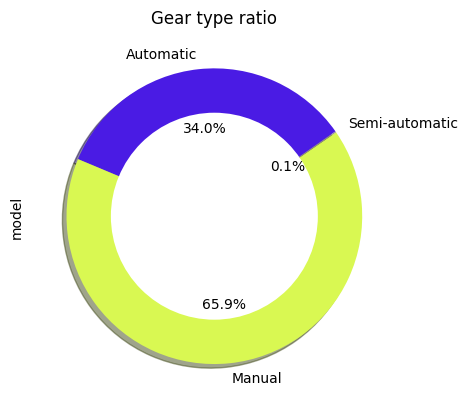

In [ ]:
# Check gear type ratio

import matplotlib.pyplot as plt

pie_gear = cars.groupby(['gear']).count()
plot_gear = pie_gear.plot.pie(y = 'model', title="Gear type ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#4a1be4', '#d9f852', '#95928c'],
                   shadow=True, startangle=35)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Add circle to the pie chart
fig.gca().add_artist(centre_circle)

In [ ]:
cars['gear'].value_counts()

,count
gear,
Manual,30492
Automatic,15714
Semi-automatic,56


In [ ]:
cars['fuel'].value_counts()

,count
fuel,
Gasoline,28822
Diesel,15220
Electric/Gasoline,1150
Electric,725
LPG,126
CNG,116
Electric/Diesel,53
Others,47
Ethanol,2


In [ ]:
cars.loc[cars['fuel'] == 'Others']

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,price-bin
2994,50150,Toyota,Verso-S,Others,Manual,Used,9450,99.00,2015,5-100 hp,< 10000€
3126,49,Fiat,500,Others,Manual,Pre-registered,14190,69.00,2021,5-100 hp,10000-20000€
4504,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,5-100 hp,< 10000€
4505,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,5-100 hp,< 10000€
4849,800,Fiat,500,Others,Manual,Pre-registered,14490,69.00,2021,5-100 hp,10000-20000€
4857,49,Fiat,500,Others,Manual,Pre-registered,14989,69.00,2021,5-100 hp,10000-20000€
5207,43400,Toyota,Aygo,Others,Manual,Used,8584,72.00,2018,5-100 hp,< 10000€
6529,1500,Renault,Clio,Others,Manual,Demonstration,15580,72.00,2021,5-100 hp,10000-20000€
7206,119076,Renault,Clio,Others,Manual,Used,5990,73.00,2013,5-100 hp,< 10000€
8070,87051,Toyota,Yaris,Others,Automatic,Used,10200,101.00,2014,100-200 hp,10000-20000€


Some fuel-related data is useless because it provides insufficient information for analysis and visualization. We can use grouping.


In [ ]:
cars['fuel_group'] = cars['fuel']

In [ ]:
# Rename LPG CNG Ethanol Hydrogen with Gas

cars['fuel_group'] = cars['fuel']
cars['fuel_group'].replace('LPG', 'Gas', inplace = True)
cars['fuel_group'].replace('CNG', 'Gas', inplace = True)
cars['fuel_group'].replace('Ethanol', 'Gas', inplace = True)
cars['fuel_group'].replace('Hydrogen', 'Gas', inplace = True)

<ipython-input-40-68ff40bea9d2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel_group'].replace('LPG', 'Gas', inplace = True)
<ipython-input-40-68ff40bea9d2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Checking information about models of cars that have "Other" fuel types, we can find out that almost all of them may possibly have gasoline fuel types.


In [ ]:
# Replace 'Others' value with 'Gasoline'
cars['fuel_group'].replace('Others' ,'Gasoline', inplace=True)

<ipython-input-43-d27323366acd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel_group'].replace('Others' ,'Gasoline', inplace=True)


In [ ]:
# Group 'Electric/Gasoline' and 'Electric/Diesel' into 'Hybrid'
cars['fuel_group'].replace('Electric/Gasoline','Hybrid',inplace=True)
cars['fuel_group'].replace('Electric/Diesel','Hybrid',inplace=True)

<ipython-input-44-f5e19f3bae18>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel_group'].replace('Electric/Gasoline','Hybrid',inplace=True)
<ipython-input-44-f5e19f3bae18>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
cars['fuel_group'].value_counts()

,count
fuel_group,
Gasoline,28869
Diesel,15220
Hybrid,1203
Electric,725
Gas,245


In [ ]:
cars['offerType'].value_counts()

,count
offerType,
Used,39997
Pre-registered,2773
Demonstration,2360
Employee's car,1119
New,13


Almost all the cars are Used .Hence we can again group cars as new and used.

In [ ]:
# add 'Pre-registered' 'Demonstration' into 'New'

cars['new/used'] = cars['offerType']
cars['new/used'].replace('Pre-registered', 'New', inplace = True)
cars['new/used'].replace('Demonstration', 'New', inplace = True)

<ipython-input-47-cece06e8d48b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['new/used'].replace('Pre-registered', 'New', inplace = True)
<ipython-input-47-cece06e8d48b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
# add 'Employee's car' into 'Used'
cars['new/used'].replace("Employee's car", 'Used', inplace = True)

<ipython-input-48-d1671000c4f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['new/used'].replace("Employee's car", 'Used', inplace = True)


In [ ]:
cars['new/used'].value_counts()

,count
new/used,
Used,41116
New,5146


Text(0.5, 1.0, 'Novelty bars')

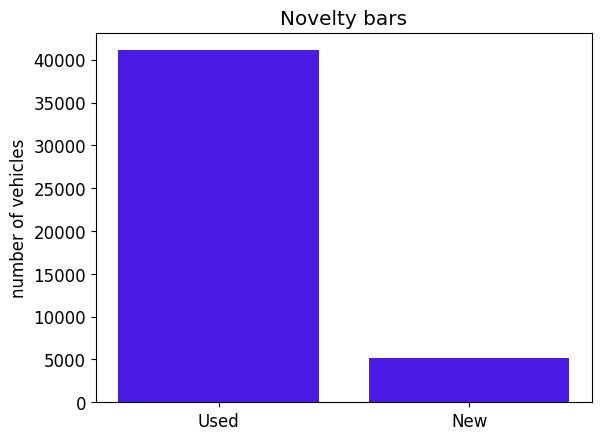

In [ ]:
plt.rcParams['font.size'] = 12

pyplot.bar(cars['new/used'].unique(), cars['new/used'].value_counts(), color = '#4a1be4')

pyplot.ylabel('number of vehicles')
pyplot.title('Novelty bars')

In [ ]:
#now lets look at some relationships between the numerical values
cars.corr()

ValueError: could not convert string to float: 'BMW'

In [ ]:
# Selecting  only numerical features for correlation analysis and displaying them.
numerical_features = cars.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

         mileage  price    hp  year
mileage     1.00  -0.30 -0.01 -0.68
price      -0.30   1.00  0.75  0.41
hp         -0.01   0.75  1.00  0.17
year       -0.68   0.41  0.17  1.00


In [ ]:
gear_test = cars[['gear', 'model', 'price']]
pricegear_test = gear_test[['gear', 'price']].groupby(['gear'])
gear_test.groupby('gear').head(2)


,gear,model,price
0,Manual,316,6800
1,Manual,Golf,6877
5,Automatic,Auris,6950
8,Automatic,3,6980
901,Semi-automatic,Corsa,9780
902,Semi-automatic,Corsa,9780


In [ ]:
gear_test

,gear,model,price
0,Manual,316,6800
1,Manual,Golf,6877
2,Manual,Exeo,6900
3,Manual,Megane,6950
4,Manual,308,6950
...,...,...,...
46257,Manual,500,12990
46258,Manual,500,12990
46259,Manual,500,12990
46260,Manual,500,12990


In [ ]:
pricegear_test.get_group('Manual')['price']

<ipython-input-57-be8395121934>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  pricegear_test.get_group('Manual')['price']


,price
0,6800
1,6877
2,6900
3,6950
4,6950
...,...
46257,12990
46258,12990
46259,12990
46260,12990


(0.0, 1260344.992635821)

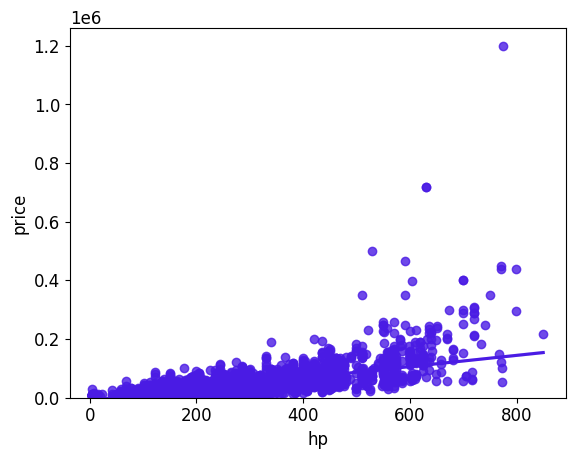

In [ ]:
# Create a scatterplot and shows regression line that shows price by hp distribution

sns.regplot(x='hp', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,)

(0.0, 400000.0)

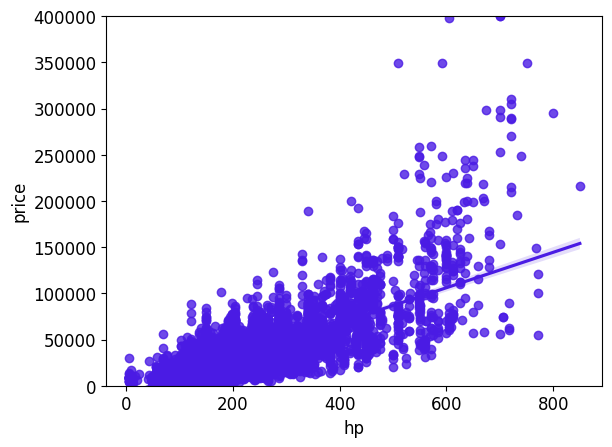

In [ ]:
sns.regplot(x='hp', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,400000)

(0.0, 1259840.0)

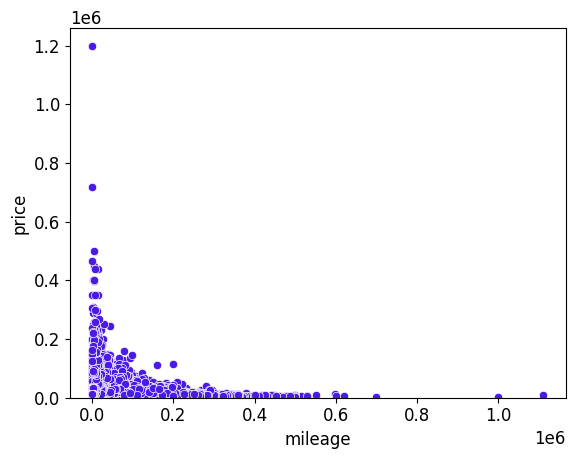

In [ ]:



# Similarly Creating  a scatterplot that shows regression line that shows price by mileage distribution
sns.scatterplot(x='mileage', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,)






(0.0, 1259840.0)

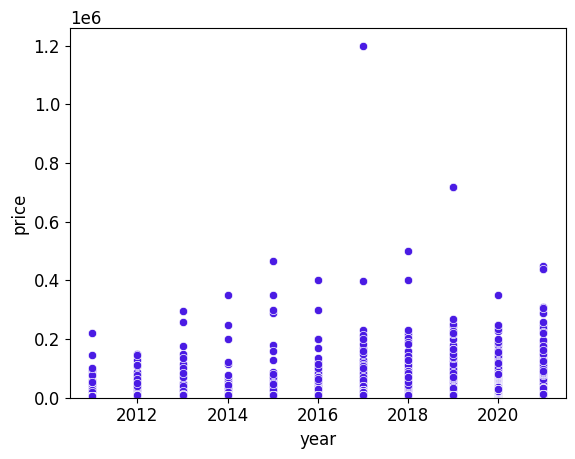

In [ ]:
#  price by year distribution
sns.scatterplot(x='year', y = 'price', data = cars, color = '#4a1be4')
plt.ylim(0,)

In [ ]:
# Add columns with value_counts of model and make to dataframe

cars['model_available'] = cars['model'].map(cars['model'].value_counts())
cars['make_count'] = cars['make'].map(cars['make'].value_counts())
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,price-bin,fuel_group,new/used,model_available,make_count
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011,100-200 hp,< 10000€,Diesel,Used,49,2400
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011,100-200 hp,< 10000€,Gasoline,Used,1492,6921
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011,100-200 hp,< 10000€,Gasoline,Used,15,1924
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011,100-200 hp,< 10000€,Gasoline,Used,389,2828
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011,100-200 hp,< 10000€,Gasoline,Used,179,1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,5-100 hp,10000-20000€,Hybrid,New,666,1700
